
# Multivariant Linear Regression Assignment

In [24]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
# Loading dataset
column_names = ["size","bedroom","price"]
data = pd.read_csv('data/ex1data2.txt', names = column_names)

In [3]:
# Correlation 
corr = data.corr()
corr.style.background_gradient(cmap='Spectral')

,size,bedroom,price
size,1,0.559967,0.854988
bedroom,0.559967,1,0.442261
price,0.854988,0.442261,1


Looking at the result between price and bedroom, you can say that there is low correlation which might make it not a good feature to predict price..

In [156]:
f_data= data[['size','bedroom']]
y_data=data[['price']]
f_data.shape
f_data.head(5)

,size,bedroom
0,2104,3
1,1600,3
2,2400,3
3,1416,2
4,3000,4


In [158]:
y_data.head(5)

,price
0,399900
1,329900
2,369000
3,232000
4,539900


In [11]:
#training with all the data
lm=LinearRegression()
lm.fit(f_data,y_data)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
Yhat= lm.predict(f_data)
Yhat[0:3]

array([[356283.1103389 ],
       [286120.93063401],
       [397489.46984812]])

In [129]:
lm.coef_,lm.intercept_


(array([[  139.21067402, -8738.01911233]]), array([89597.9095428]))

Theta computed from the normal equations:
 [[89597.9095428 ]
 [  139.21067402]
 [-8738.01911233]] is Same with theta computed without Scaling the features but using LinearRigression, which is 
 [89597.9095428]
 [  139.21067402] 
 [-8738.01911233]]),   

In [ ]:
I notice that without feature scaling the features, the theta above is equal to the theta gotten when using the 
[340412.56662729 109370.62327099  -6501.18166087]

In [29]:
#comparing predicted and actual values when we train using all data
yy=data['price'].values.reshape(-1,1)
dfalldata = pd.DataFrame({'Actual': yy.flatten(), 'Predicted': Yhat.flatten()})
dfalldata.head(7)

,Actual,Predicted
0,399900,356283.110339
1,329900,286120.930634
2,369000,397489.469848
3,232000,269244.185727
4,539900,472277.855146
5,299900,330979.021018
6,314900,276933.026149


In [19]:
import seaborn as sns

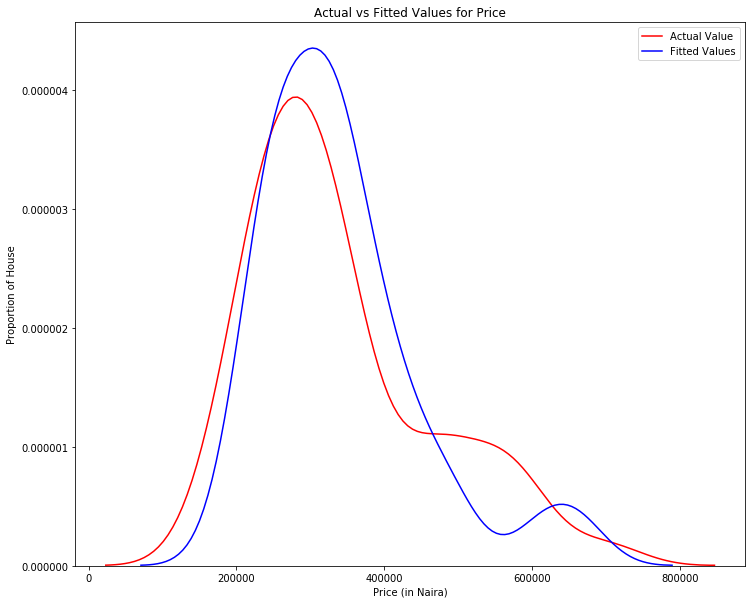

In [21]:
width=12
height=10
plt.figure(figsize=(width, height))


ax1 = sns.distplot(y_data, hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in Naira)')
plt.ylabel('Proportion of House')

plt.show()
plt.close()

Looking at the distribution plot of both actual values and predicted we can conclude that there are slight differences between the actual value and predicted values

In [95]:
#Splitting the model,so i can use 70% of the data to train and using 30percent for test
x_train,x_test,y_train,y_test= train_test_split(f_data,y_data,test_size=0.3,random_state=0)

In [96]:
lms=LinearRegression()
lms.fit(x_train,y_train)
lms.intercept_,lms.coef_

(array([89793.79977782]), array([[  131.77059948, -4570.48794717]]))

In [97]:
y_hats=lms.predict(x_test)
y_hats[0:3]

array([[365977.65478565],
       [489446.70649556],
       [322978.95632163]])

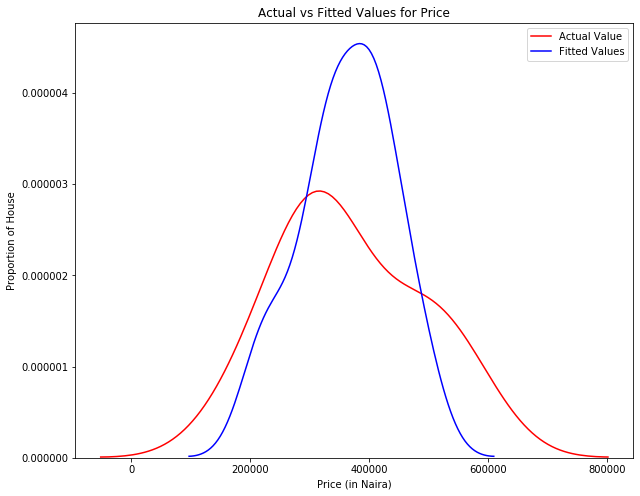

In [124]:

width=10
height=8
plt.figure(figsize=(width, height))


ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_hats, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in Naira)')
plt.ylabel('Proportion of House')

plt.show()
plt.close()

After training with different percentage range(60/40),(70/30),(80/20). From the plot above we can conclude that disparity is much compared to when we trained with all data i.e the plot before this one..

## Feature Scaling Using minmaxScaler

In [71]:
#using minmaxscaler to scale a feature
from sklearn import preprocessing
minmax= preprocessing.MinMaxScaler(feature_range=(0,1))

scaled_data= minmax.fit(f_data).transform(f_data)
scaled_data.shape

(47, 2)

In [72]:
lmsf=LinearRegression()
lmsf.fit(scaled_data,y_data)
lmsf.intercept_,lmsf.coef_

(array([199467.38469349]), array([[504777.90398791, -34952.07644931]]))

In [82]:
ypredminmax=lmsf.predict(scaled_data)
ypredminmax[0:3]


array([[356283.1103389 ],
       [286120.93063401],
       [397489.46984812]])

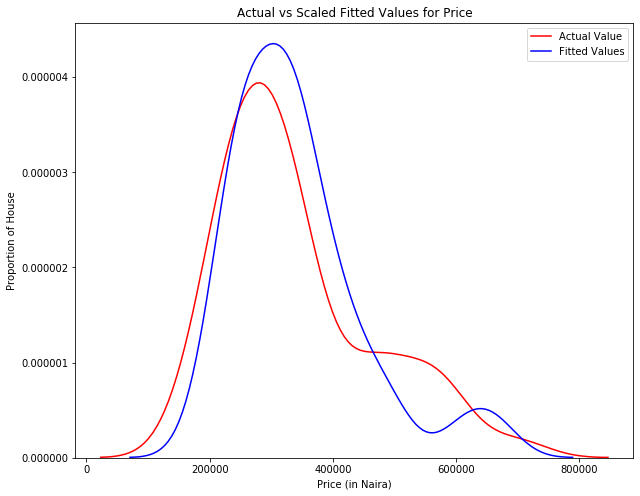

In [109]:

width=10
height=8
plt.figure(figsize=(width, height))


ax1 = sns.distplot(y_data, hist=False, color="r", label="Actual Value")
sns.distplot(ypredminmax, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Scaled Fitted Values for Price')
plt.xlabel('Price (in Naira)')
plt.ylabel('Proportion of House')

plt.show()
plt.close()

## Feature Scaling Using StandardScalar

In [152]:
#using standardscaler to scale a feature
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
st_fdata=scale.fit(f_data).transform(f_data)
st_fdata[0:5], y_data[0:5]

(array([[ 0.13141542, -0.22609337],
        [-0.5096407 , -0.22609337],
        [ 0.5079087 , -0.22609337],
        [-0.74367706, -1.5543919 ],
        [ 1.27107075,  1.10220517]]),     price
 0  399900
 1  329900
 2  369000
 3  232000
 4  539900)

In [165]:
lmsdf=LinearRegression()
lmsdf.fit(st_fdata,y_data)
print (f"intercept is {lmsdf.intercept_},and coefficients are {lmsdf.coef_[:,0]} and {lmsdf.coef_[:,1]}")

intercept is [340412.65957447],and coefficients are [109447.79646964] and [-6578.35485416]


theta gotten from the the feature scaled data in class [340412.56662729 109370.62327099  -6501.18166087] is literally equivalent to the theta gotten after scaling with Standardscaler function in sklearn which is  [340412.65957447, 109447.79646964, -6578.35485416]

In [154]:
#predicting
yhasf=lmsdf.predict(st_fdata)
yhasf[0:3]

array([[356283.1103389 ],
       [286120.93063401],
       [397489.46984812]])

In [117]:
yyf=data['price'].values.reshape(-1,1)
df = pd.DataFrame({'Actual': yyf.flatten(), 'Predicted': yhasf.flatten()})
df.head(7)

,Actual,Predicted
0,399900,356283.110339
1,329900,286120.930634
2,369000,397489.469848
3,232000,269244.185727
4,539900,472277.855146
5,299900,330979.021018
6,314900,276933.026149


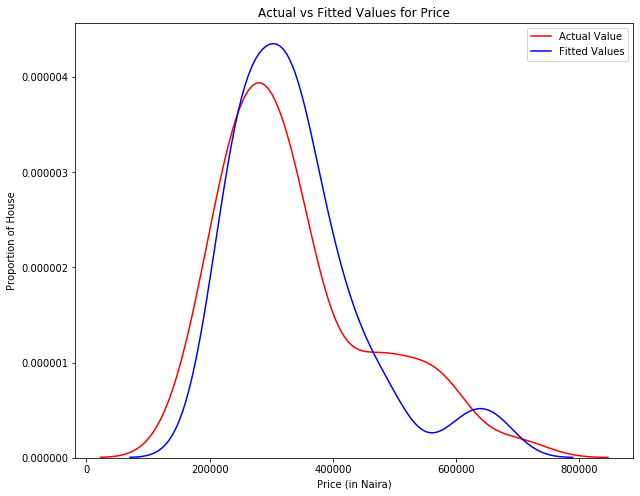

In [83]:

width=10
height=8
plt.figure(figsize=(width, height))


ax1 = sns.distplot(y_data, hist=False, color="r", label="Actual Value")
sns.distplot(yhasf, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in Naira)')
plt.ylabel('Proportion of House')

plt.show()
plt.close()

In [162]:
#comparing predicted and actual values when we train using all data
yy=data['price'].values.reshape(-1,1)
dfalldata = pd.DataFrame({'Actual': yy.flatten(), 'Predicted': Yhat.flatten()})
dfalldata.head(4)

,Actual,Predicted
0,399900,356283.110339
1,329900,286120.930634
2,369000,397489.469848
3,232000,269244.185727


In [164]:
#comparing predicted and actual values when we train using standardscaled features
yyf=data['price'].values.reshape(-1,1)
df = pd.DataFrame({'Actual': yyf.flatten(), 'Predicted': yhasf.flatten()})
df.head(4)

,Actual,Predicted
0,399900,356283.110339
1,329900,286120.930634
2,369000,397489.469848
3,232000,269244.185727


From the two tables above, you can deduce that scaling the features doesnt really have an effect on the ouput for this dataset.

In [166]:
print("Comparing the two Cost Functions ")
MSE=mean_squared_error(y_data,yhasf)
CostFunc=MSE/2
print(f"Cost func using sklearn is {CostFunc} while  using gradient descent is  21.4378" )
print(f"Approximately the same")

Comparing the two Cost Functions 
Cost func using sklearn is 2043280050.6028283 while  using gradient descent is  21.4378
Approximately the same
